## Bibliotecas

In [2]:
import pandas
import matplotlib.pyplot as plot
import seaborn as sns

## Lendo os Dados

In [3]:
dataset = pandas.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

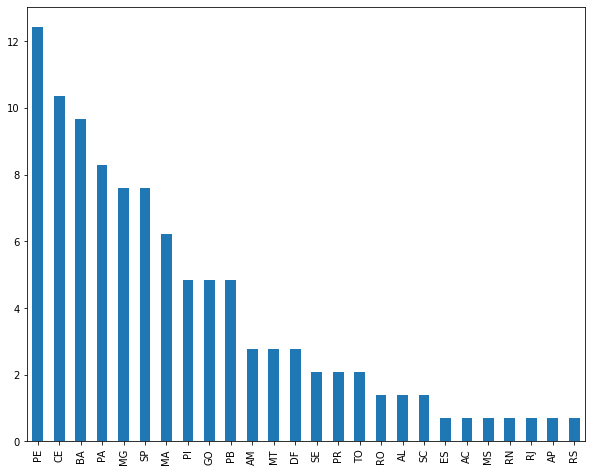

In [ ]:
students_younger_than_fourteen_by_state = dataset.query('NU_IDADE <= 14')['SG_UF_RESIDENCIA'].value_counts(normalize = True) * 100

students_younger_than_fourteen_by_state.plot.bar(figsize=(10,8))

## Utilizando seaborn para montar boxplots

### Ordenando eixos

Text(0.5, 1.0, 'Notas de Matemática pela Renda das Famílias')

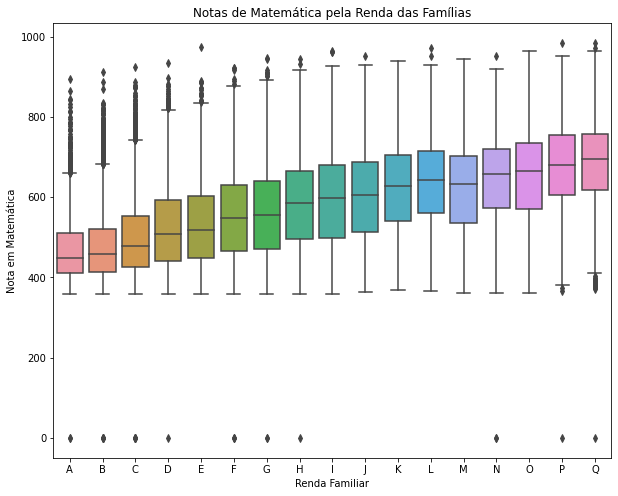

In [6]:
plot.figure(figsize = (10,8))

sorted_household_income = dataset['Q006'].unique()
sorted_household_income.sort()

sns.boxplot(x='Q006',y='NU_NOTA_MT', data=dataset, order=sorted_household_income)
plot.xlabel('Renda Familiar')
plot.ylabel('Nota em Matemática')
plot.title('Notas de Matemática pela Renda das Famílias')

### Soma com Pandas e criação de nova coluna

Text(0.5, 1.0, 'Notas do ENEM pela Renda das Famílias')

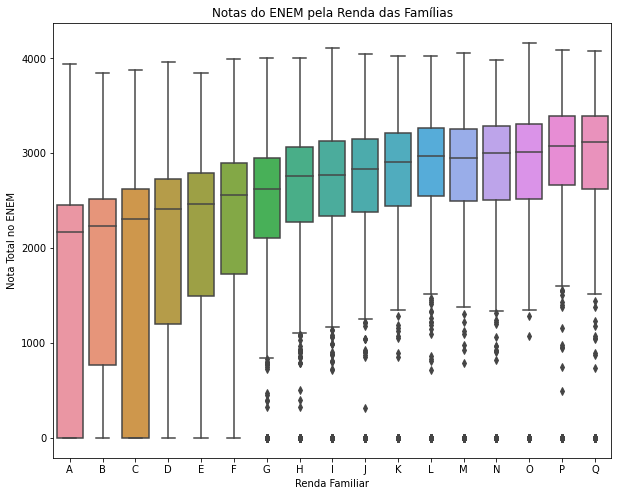

In [7]:
plot.figure(figsize = (10,8))
tests = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC','NU_NOTA_REDACAO']

dataset[tests].sum(axis=1)

dataset['NU_NOTA_TOTAL'] = dataset[tests].sum(axis=1)
sns.boxplot(x='Q006',y='NU_NOTA_TOTAL', data=dataset, order=sorted_household_income)

plot.xlabel('Renda Familiar')
plot.ylabel('Nota Total no ENEM')
plot.title('Notas do ENEM pela Renda das Famílias')

## Analisando notas 0

In [ ]:
tests.append('NU_NOTA_TOTAL')

dataset[tests].query('NU_NOTA_TOTAL == 0')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


Text(0.5, 1.0, 'Notas do ENEM pela Renda das Famílias Desconsiderando as Notas Zero')

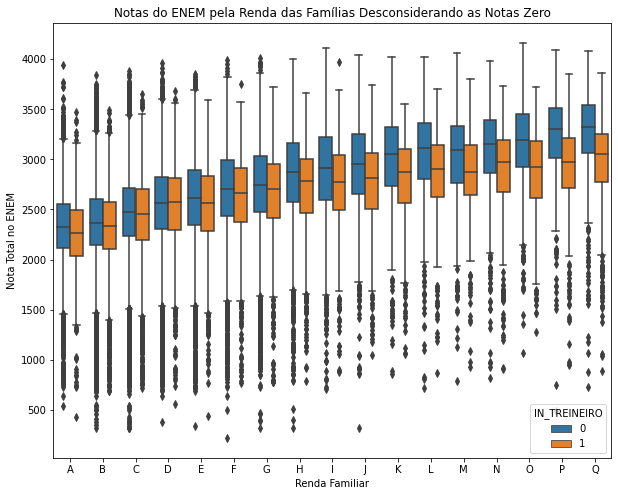

In [ ]:
plot.figure(figsize = (10,8))
students_without_zero_score = dataset.query('NU_NOTA_TOTAL != 0')

sns.boxplot(
    x='Q006',
    y='NU_NOTA_TOTAL', 
    data=students_without_zero_score, 
    order=sorted_household_income, 
    hue='IN_TREINEIRO')

plot.xlabel('Renda Familiar')
plot.ylabel('Nota Total no ENEM')
plot.title('Notas do ENEM pela Renda das Famílias Desconsiderando as Notas Zero')

## Desafio 2: Aumentar a amostra para alunos menor de idade e  comparar a proporção de estados

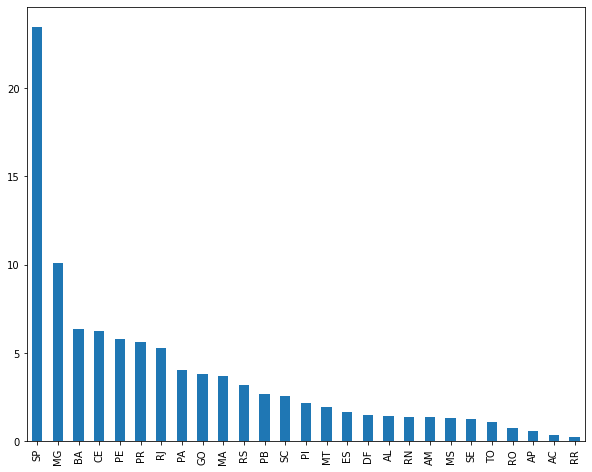

In [ ]:
under_age_students = dataset.query('NU_IDADE <= 17')['SG_UF_RESIDENCIA'].value_counts(normalize = True) * 100

under_age_students.plot.bar(figsize=(10,8))

## Desafio 3: Montar função para gerar boxplots

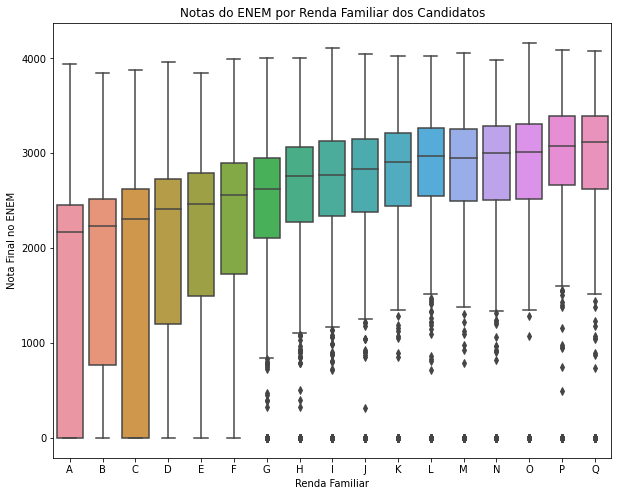

In [ ]:
def plot_boxplot(title = None, x_label = None, y_label = None, **kwargs):
  plot.figure(figsize = (10,8))

  graph = sns.boxplot(**kwargs)

  plot.title(title)
  plot.xlabel(x_label)
  plot.ylabel(y_label)

  return graph

plot_boxplot(data=dataset, 
             x='Q006', 
             y='NU_NOTA_TOTAL', 
             order=sorted_household_income,
             title='Notas do ENEM por Renda Familiar dos Candidatos',
             x_label='Renda Familiar',
             y_label='Nota Final no ENEM')



## Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente



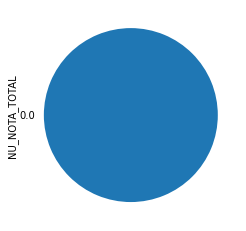

In [10]:
dataset.query('TP_PRESENCA_CH != 1 and TP_PRESENCA_CN != 1 and TP_PRESENCA_LC != 1 and TP_PRESENCA_MT != 1')['NU_NOTA_TOTAL'].value_counts().plot.pie()

## Desafio 5: Quem é eliminado tira zero ou será NaN?(não teve registro de notas)

In [ ]:
dataset.query('TP_PRESENCA_LC == 2')['NU_NOTA_LC']

77       NaN
396      NaN
446      NaN
609      NaN
728      NaN
          ..
124695   NaN
125216   NaN
125784   NaN
126769   NaN
127122   NaN
Name: NU_NOTA_LC, Length: 126, dtype: float64

## Desafio 6: Verificar proporção de treineiros por classe social

Text(0, 0.5, 'Número de Treineiros')

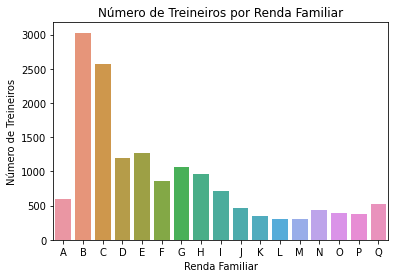

In [ ]:
trainees = dataset.query('IN_TREINEIRO == 1')['Q006'].value_counts(normalize=True) * 100

sns.countplot(data=dataset.query('IN_TREINEIRO == 1'), x='Q006', order=sorted_household_income)

plot.title('Número de Treineiros por Renda Familiar')
plot.xlabel('Renda Familiar')
plot.ylabel('Número de Treineiros')

## Desafio 7: Fazer o mesmo boxplot dos treineiros verificando as pessoas que tem ou não tem internet

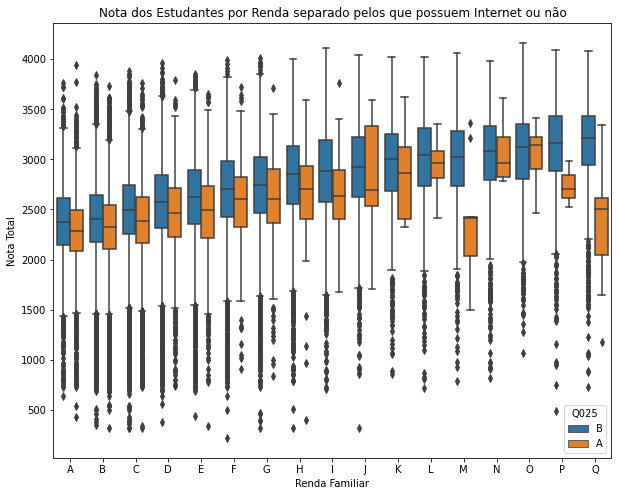

In [ ]:
graph = plot_boxplot(data = students_without_zero_score, 
                     x = 'Q006', 
                     y = 'NU_NOTA_TOTAL', 
                     hue = 'Q025', 
                     order = sorted_household_income,
                     title = 'Nota dos Estudantes por Renda separado pelos que possuem Internet ou não',
                     x_label = 'Renda Familiar',
                     y_label = 'Nota Total')



## Desafio Pessoal: Relação de quem faltou a prova com o número de carros na família

Text(0, 0.5, 'Número de Estudantes')

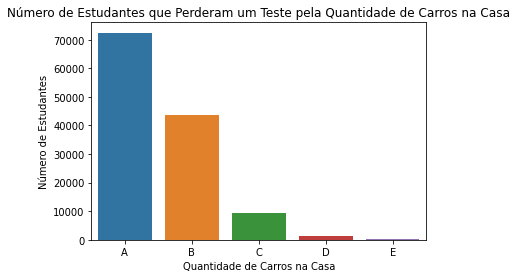

In [ ]:
students_who_missed_a_test = dataset.query('TP_PRESENCA_CH == 0 or TP_PRESENCA_CN == 0 or TP_PRESENCA_LC == 0 or TP_PRESENCA_MT == 0')

sns.countplot(data=dataset, x='Q010')

plot.title('Número de Estudantes que Perderam um Teste pela Quantidade de Carros na Casa')
plot.xlabel('Quantidade de Carros na Casa')
plot.ylabel('Número de Estudantes')